# 4 Logistic Regression

### Logistic Function

For some event $A$, define its odds by ${\rm odds}(A) = \dfrac{\mathbb P(A)}{1 - \mathbb P(A)}$. Define the logit function to be 
${\rm logit}(p) = \log\dfrac{p}{1-p}$. Define the inverse logit function, or known as logistic function, by the inverse of logit function, $\sigma(x) = \dfrac{1}{1+\exp(-x)}$.

Properties:

1. $\sigma(-x) = 1 - \sigma(x)$.
2. $\sigma'(x) = \sigma(x)(1- \sigma(x)) = \sigma(x)\sigma(-x)$.
3. $\dfrac{\partial \log \sigma(x)}{\partial x} = 1 - \sigma(x) = \sigma(-x)$.

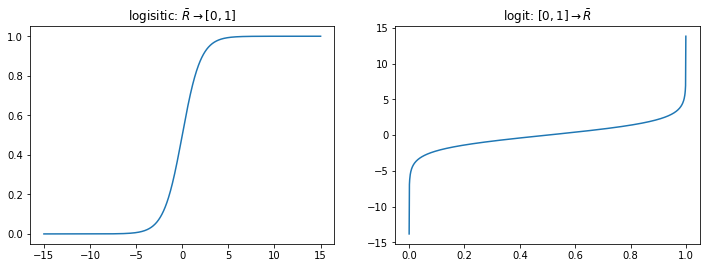

In [24]:
import numpy as np
from matplotlib import pyplot as plt
x = np.linspace(-15, 15, 1000)
logistic = 1. / (1 + np.exp(-x))
x2 = np.linspace(1e-6, 1 - 1e-6, 1000)
logit = np.log(x2 / (1 - x2))

plt.figure(figsize = (12, 4))
for i, x_, y_, title in zip((1,2), (x,x2), (logistic,logit), 
        ('logisitic: $\\bar R\\rightarrow [0,1]$','logit: $[0,1]\\rightarrow \\bar R$')):
    plt.subplot(1, 2, i)
    plt.plot(x_, y_)
    plt.title(title)
plt.show()

## Logistic Regression

There exists $\beta\in\mathbb R^{k+1}$ such that, given covariates $x\in\mathbb R^k$, then random varaible $y\in\{0,1\}$ follows a conditional Bernoulli distribution,
$$y|x \sim B(\sigma(x^T\beta) )=\left\{\begin{aligned}1 & ,\quad {\rm with\ prob\ }\sigma(x^T\beta),\\ 0 &,\quad  {\rm with\ prob\ }1-\sigma(x^T\beta).\end{aligned}\right. $$

Here $\sigma(t) = \dfrac{1}{1+\exp(-t)}$ is the logistic function.

### Maximum Log-likelihood Estimator

Write $p_i = \sigma([1,x_i^T]\beta)$ so that the likelihood of $y_i$ given $x_i$ is $p_i^{y_i}(1 - p_i)^{1 - y_i}$. Thus, given observations $(x_i,y_i),\ (i=1,\dotsc,n)$, the loglikelihood is given by
$$\begin{aligned}\ell &= \log\prod_{i=1}^n p_i^{y_i}(1 - p_i)^{1 - y_i} = \sum_{i=1}^n\left\{ y_i \log p_i +(1-y_i)\log (1 - p_i)\right\}\\ &= \sum_{i=1}^n \left\{y_i \log \frac{p_i}{1 - p_i} + \log (1 - p_i)\right\}
=\sum_{i=1}^n y_i x_i^T\beta + \sum_{i=1}^n\log \sigma(-x_i^T\beta).
\end{aligned}$$

Hence, 
$$\frac{\partial \ell}{\partial \beta^T} = \sum_{i=1}^n x_i\left(y_i -   \sigma(x_i^T\beta)\right).
$$


### Iterative Reweighted Least Squares

We can solve ${\rm argmin}_\beta \{-\ell\} $ numerically with Newton's iteration. The Hessian is computed as
$$\frac{\partial^2 \ell}{\partial \beta\partial \beta^T} = \sum_{i=1}^n x_i\sigma(x_i^T\beta)\sigma(-x_i^T\beta)x_i^T.$$

Hence we iterate by 
$$\beta^{(t+1)}=\beta^{(t)}-\left(\sum_{i=1}^n x_i\sigma(x_i^T\beta)\sigma(-x_i^T\beta)x_i^T\right)^{-1}\sum_{i=1}^n x_i\left(y_i -   \sigma(x_i^T\beta)\right).$$


If we write $X = [x_1,\dotsc,x_n]^T\in\mathbb R^{n\times k}$ (or $\in\mathbb R^{n\times (k+1)}$ if the first column of $x$ is one) and $W = {\rm diag}[p_i(1 - p_i)]\in\mathbb R^{n\times n}$, then it is 
$$\begin{aligned}\beta^{(t+1)}&=\beta^{(t)}-(X^TWX)^{-1}X^T(y - p)
\\ &= \beta^{(t)}-(X^T\sqrt{W}\sqrt{W}X)^{-1}X^T\sqrt{W} \sqrt{W}(y - p).\end{aligned}$$

The second term is equivalent to solving the least squares $\min_{\tilde \beta}\Vert \sqrt{W}X\tilde \beta -\sqrt{W}(y-p)\Vert^2$, so the algorithm is also named as iterative reweighted least squares.